In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def lens_mapping(theta1, theta2,mu_r,mu_t):
    thetaSq = theta1**2 + theta2**2
    beta1 = theta1/mu_r - theta1/thetaSq
    beta2 = theta2/mu_t - theta2/thetaSq
    return beta1, beta2

In [3]:
def critical_curve_1(phi,mu_r,mu_t):
    cos = np.cos
    sqrt = np.sqrt
    cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)
    del cos, sqrt
    return cc1

In [4]:
def critical_curve_3(phi,mu_r,mu_t):
    return -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)+np.sqrt(4*mu_t*mu_r+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)

In [5]:
#crit

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


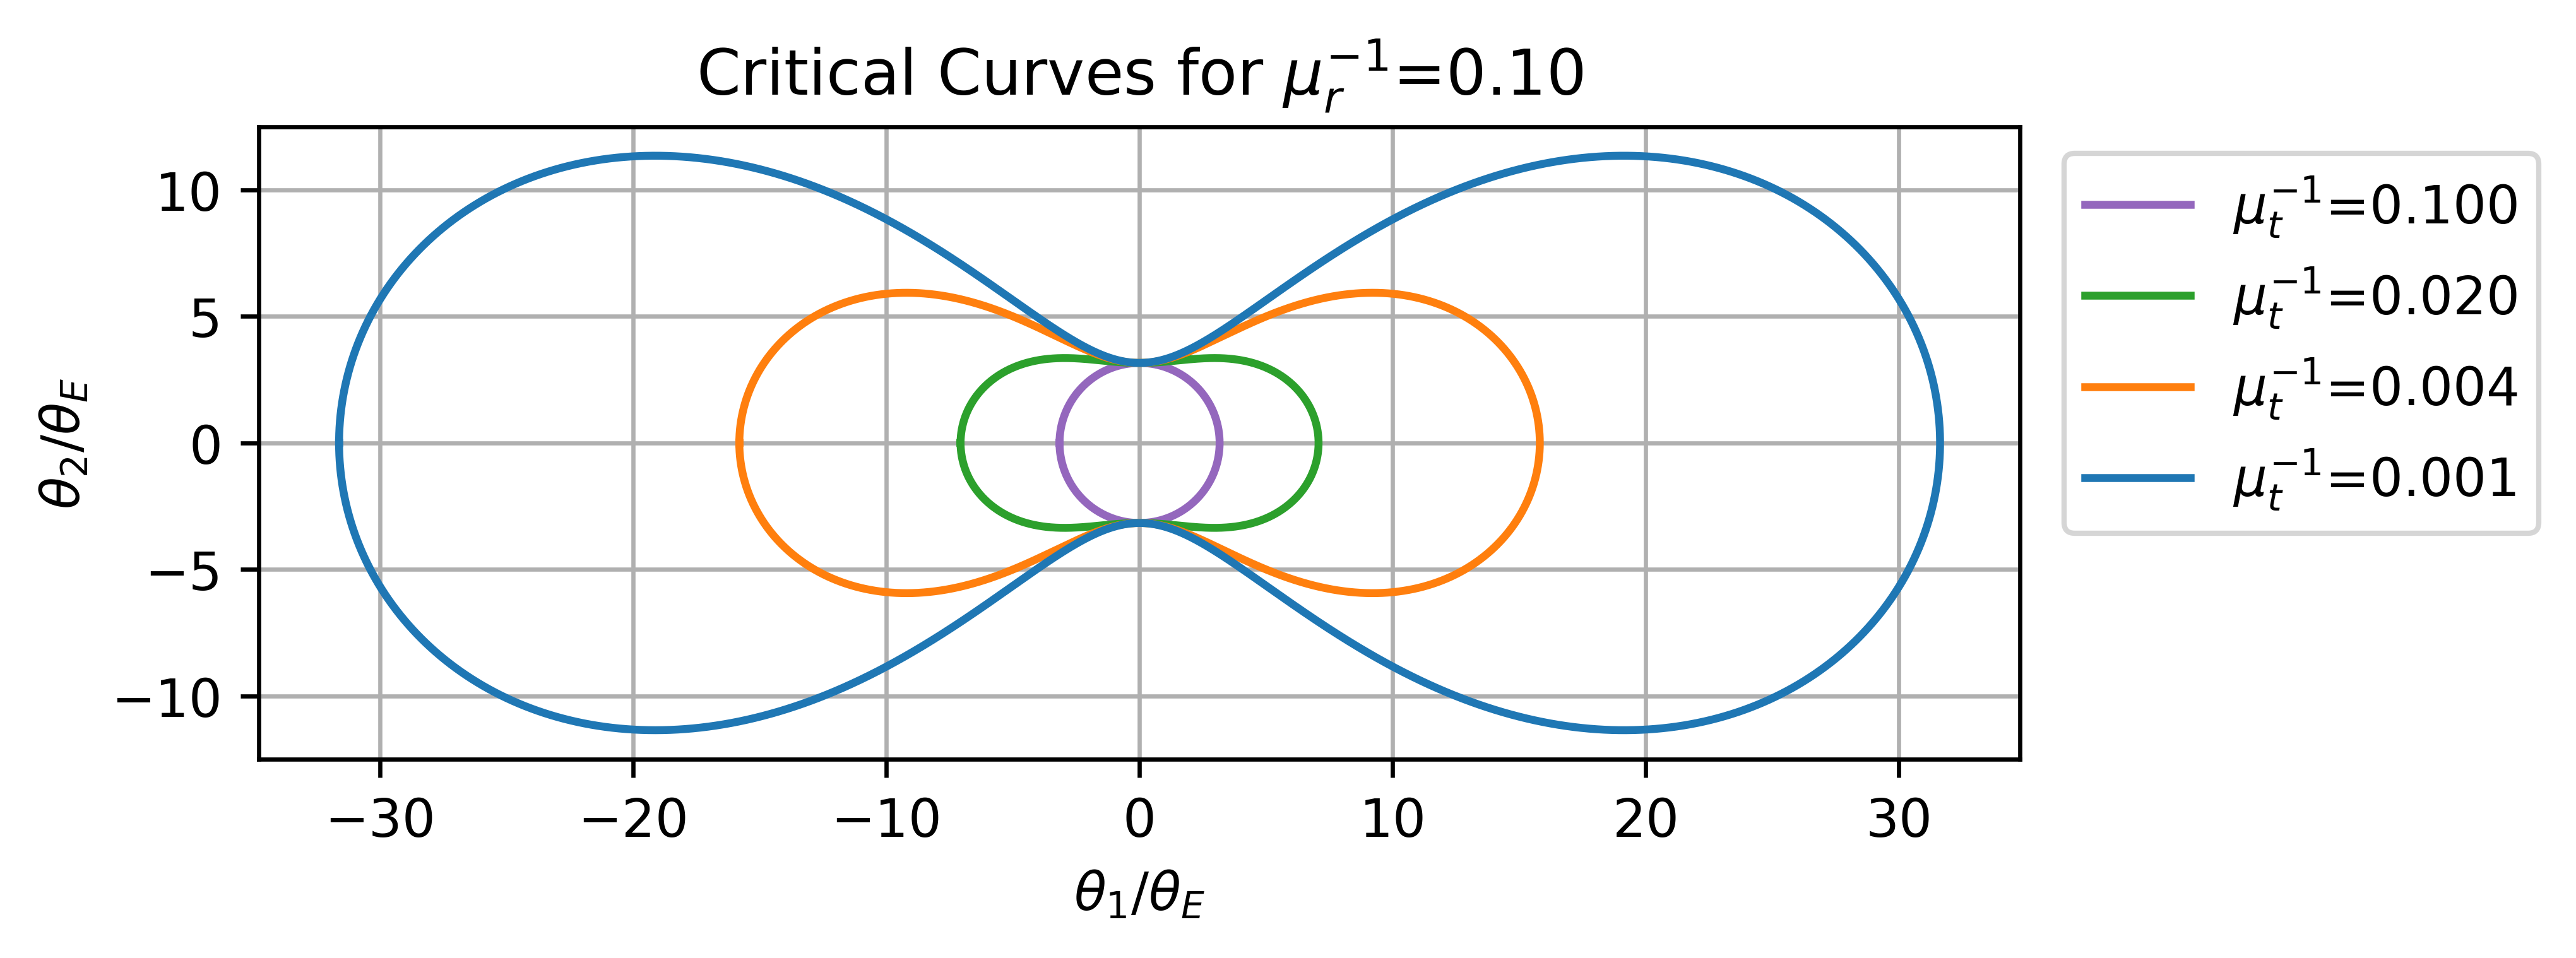

In [6]:
with PdfPages('./Images/critical_curves-mut-gtr-0-diff-mut.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_t,color in zip([1/0.1,1/0.02,1/0.004,1/0.001],['tab:blue','tab:orange','tab:green','tab:purple'][::-1]):
        mu_r = 1/0.1
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        ax.plot(cc3*np.cos(phi),cc3*np.sin(phi),color=color,label='$\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
        ax.plot(cc1*np.cos(phi),cc1*np.sin(phi),color=color)
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_r^{-1}$='+f'{mu_r**(-1):.2f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig( bbox_inches='tight')

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


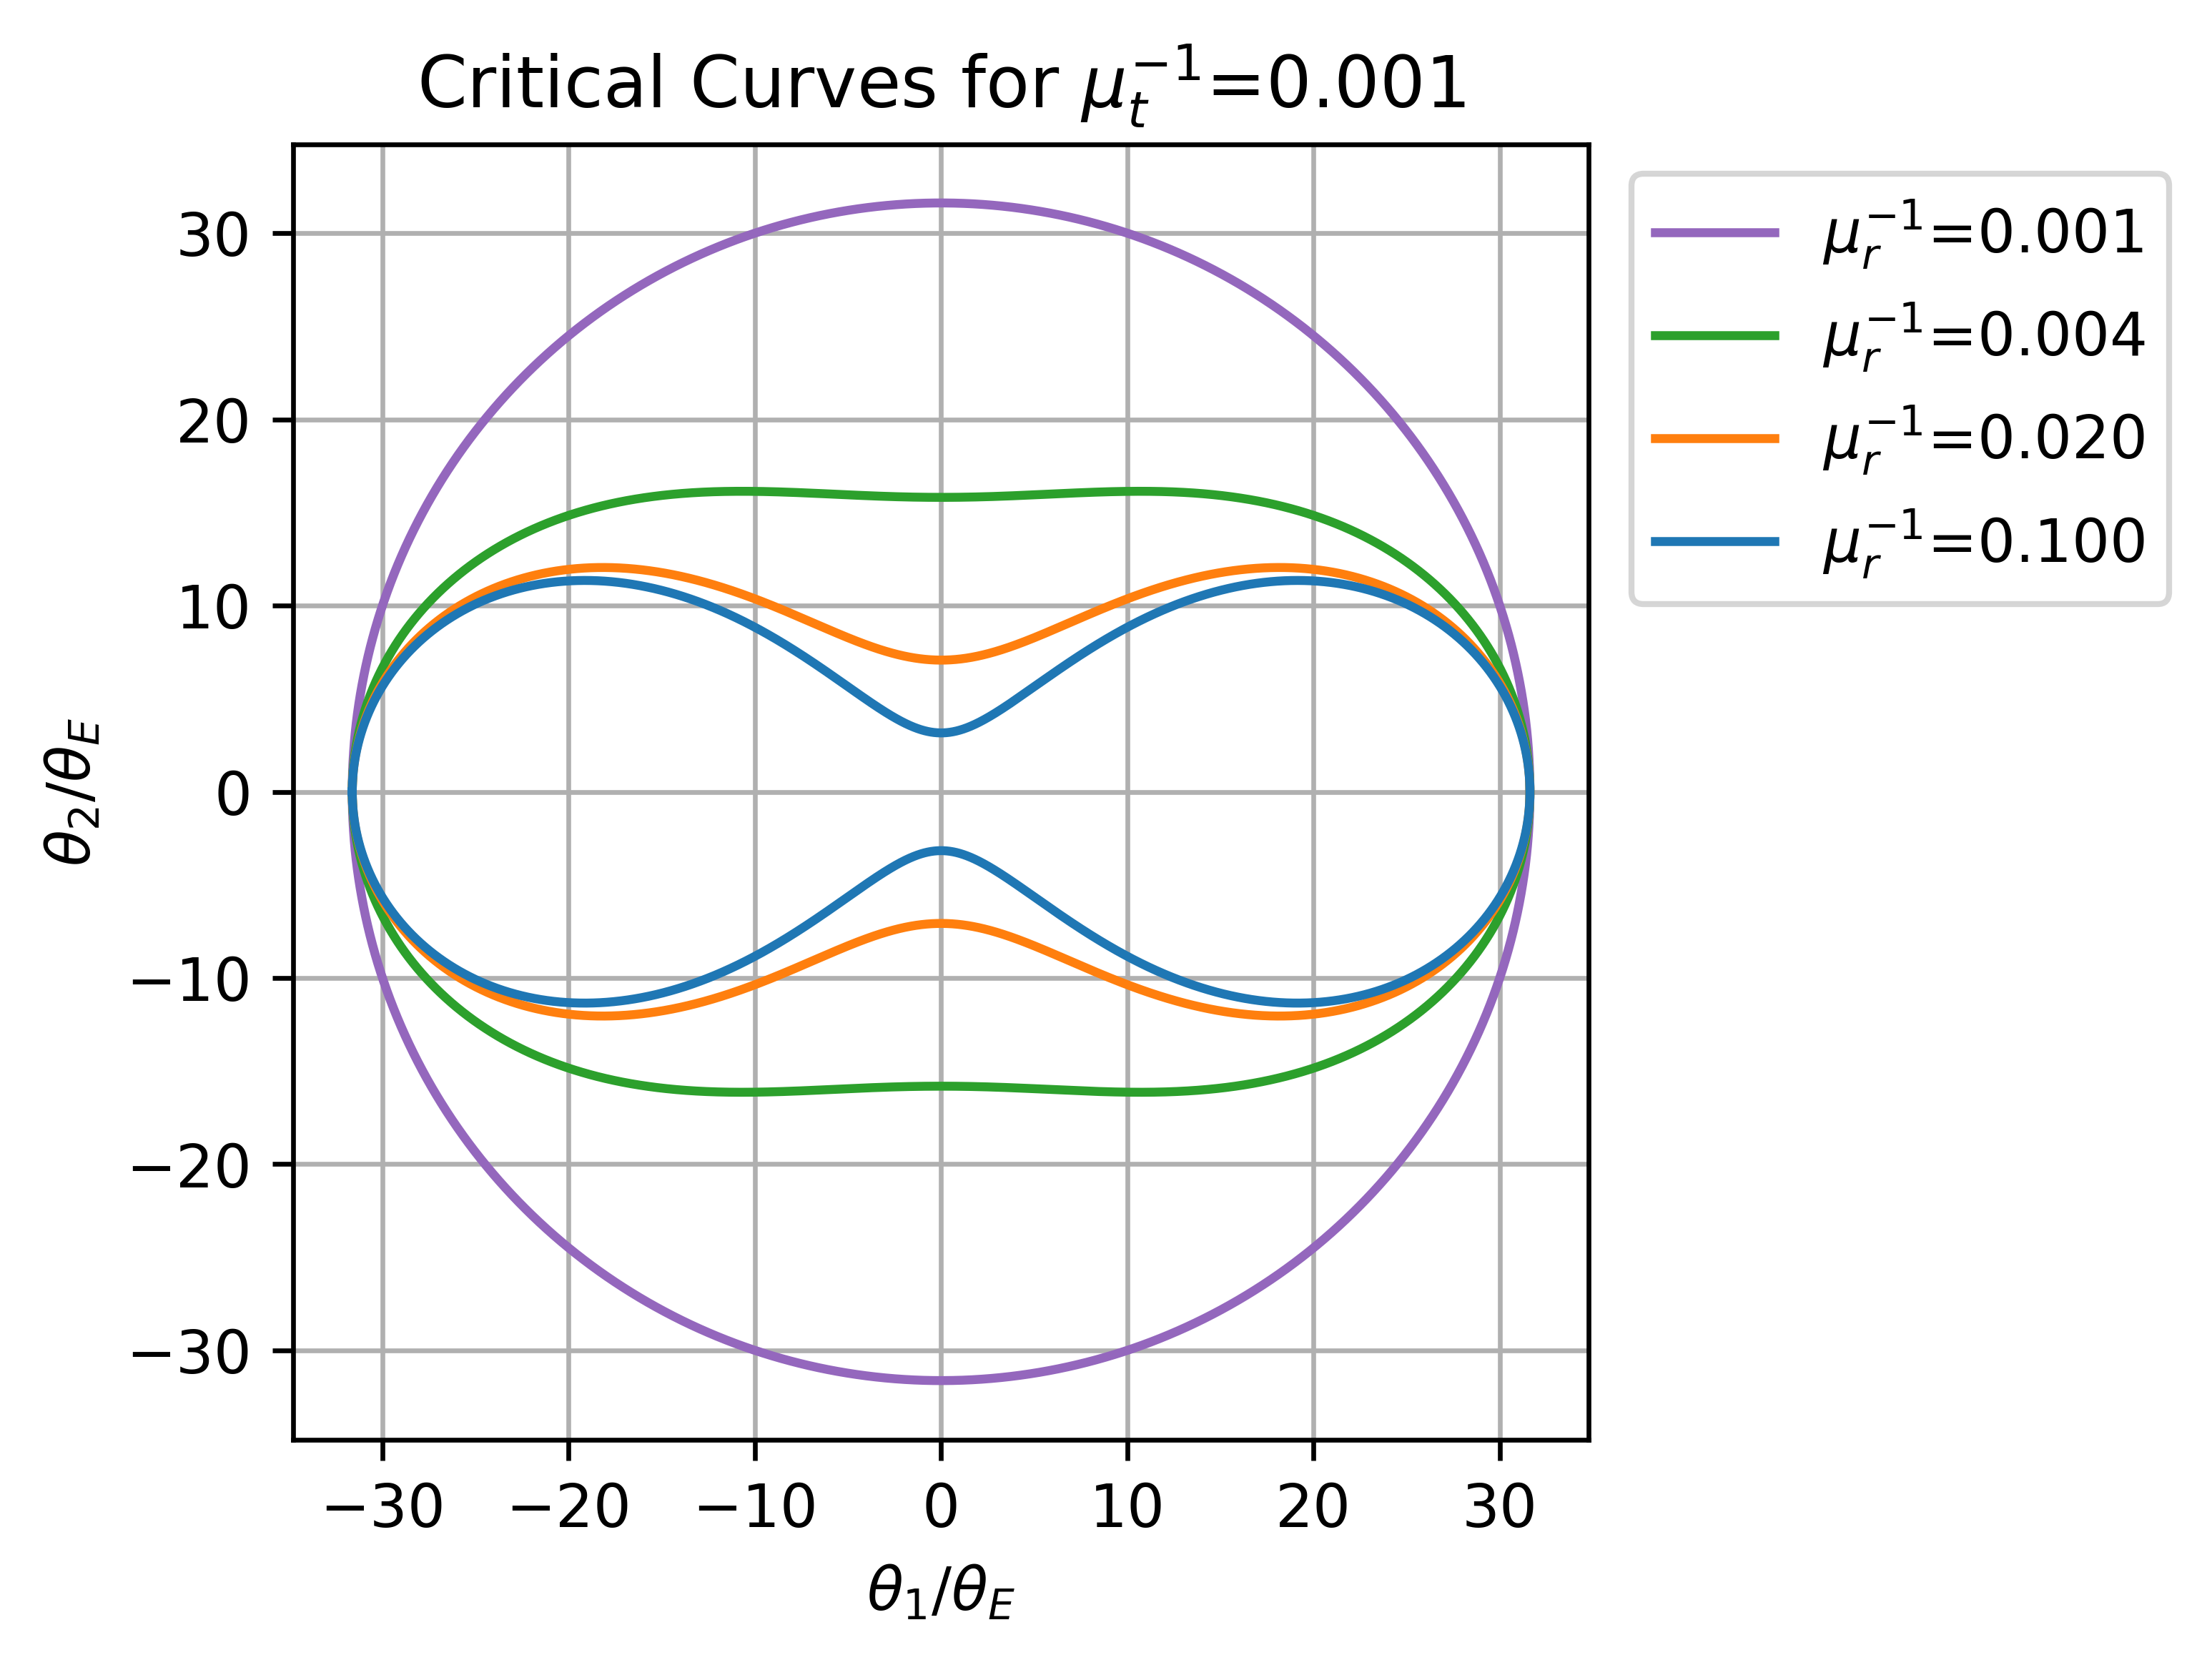

In [7]:
with PdfPages('./Images/critical_curves-mut-gtr-0-diff-mur.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_r,color in zip([1/0.1,1/0.02,1/0.004,1/0.001][::-1],['tab:blue','tab:orange','tab:green','tab:purple'][::-1]):
        mu_t = 1/0.001
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        ax.plot(cc3*np.cos(phi),cc3*np.sin(phi),color=color,label='$\mu_r^{-1}$='+f'{mu_r**(-1):.3f}')
        ax.plot(cc1*np.cos(phi),cc1*np.sin(phi),color=color)
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig( bbox_inches='tight')

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)
/tmp/ipykernel_516/2623666231.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)+np.sqrt(4*mu_t*mu_r+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


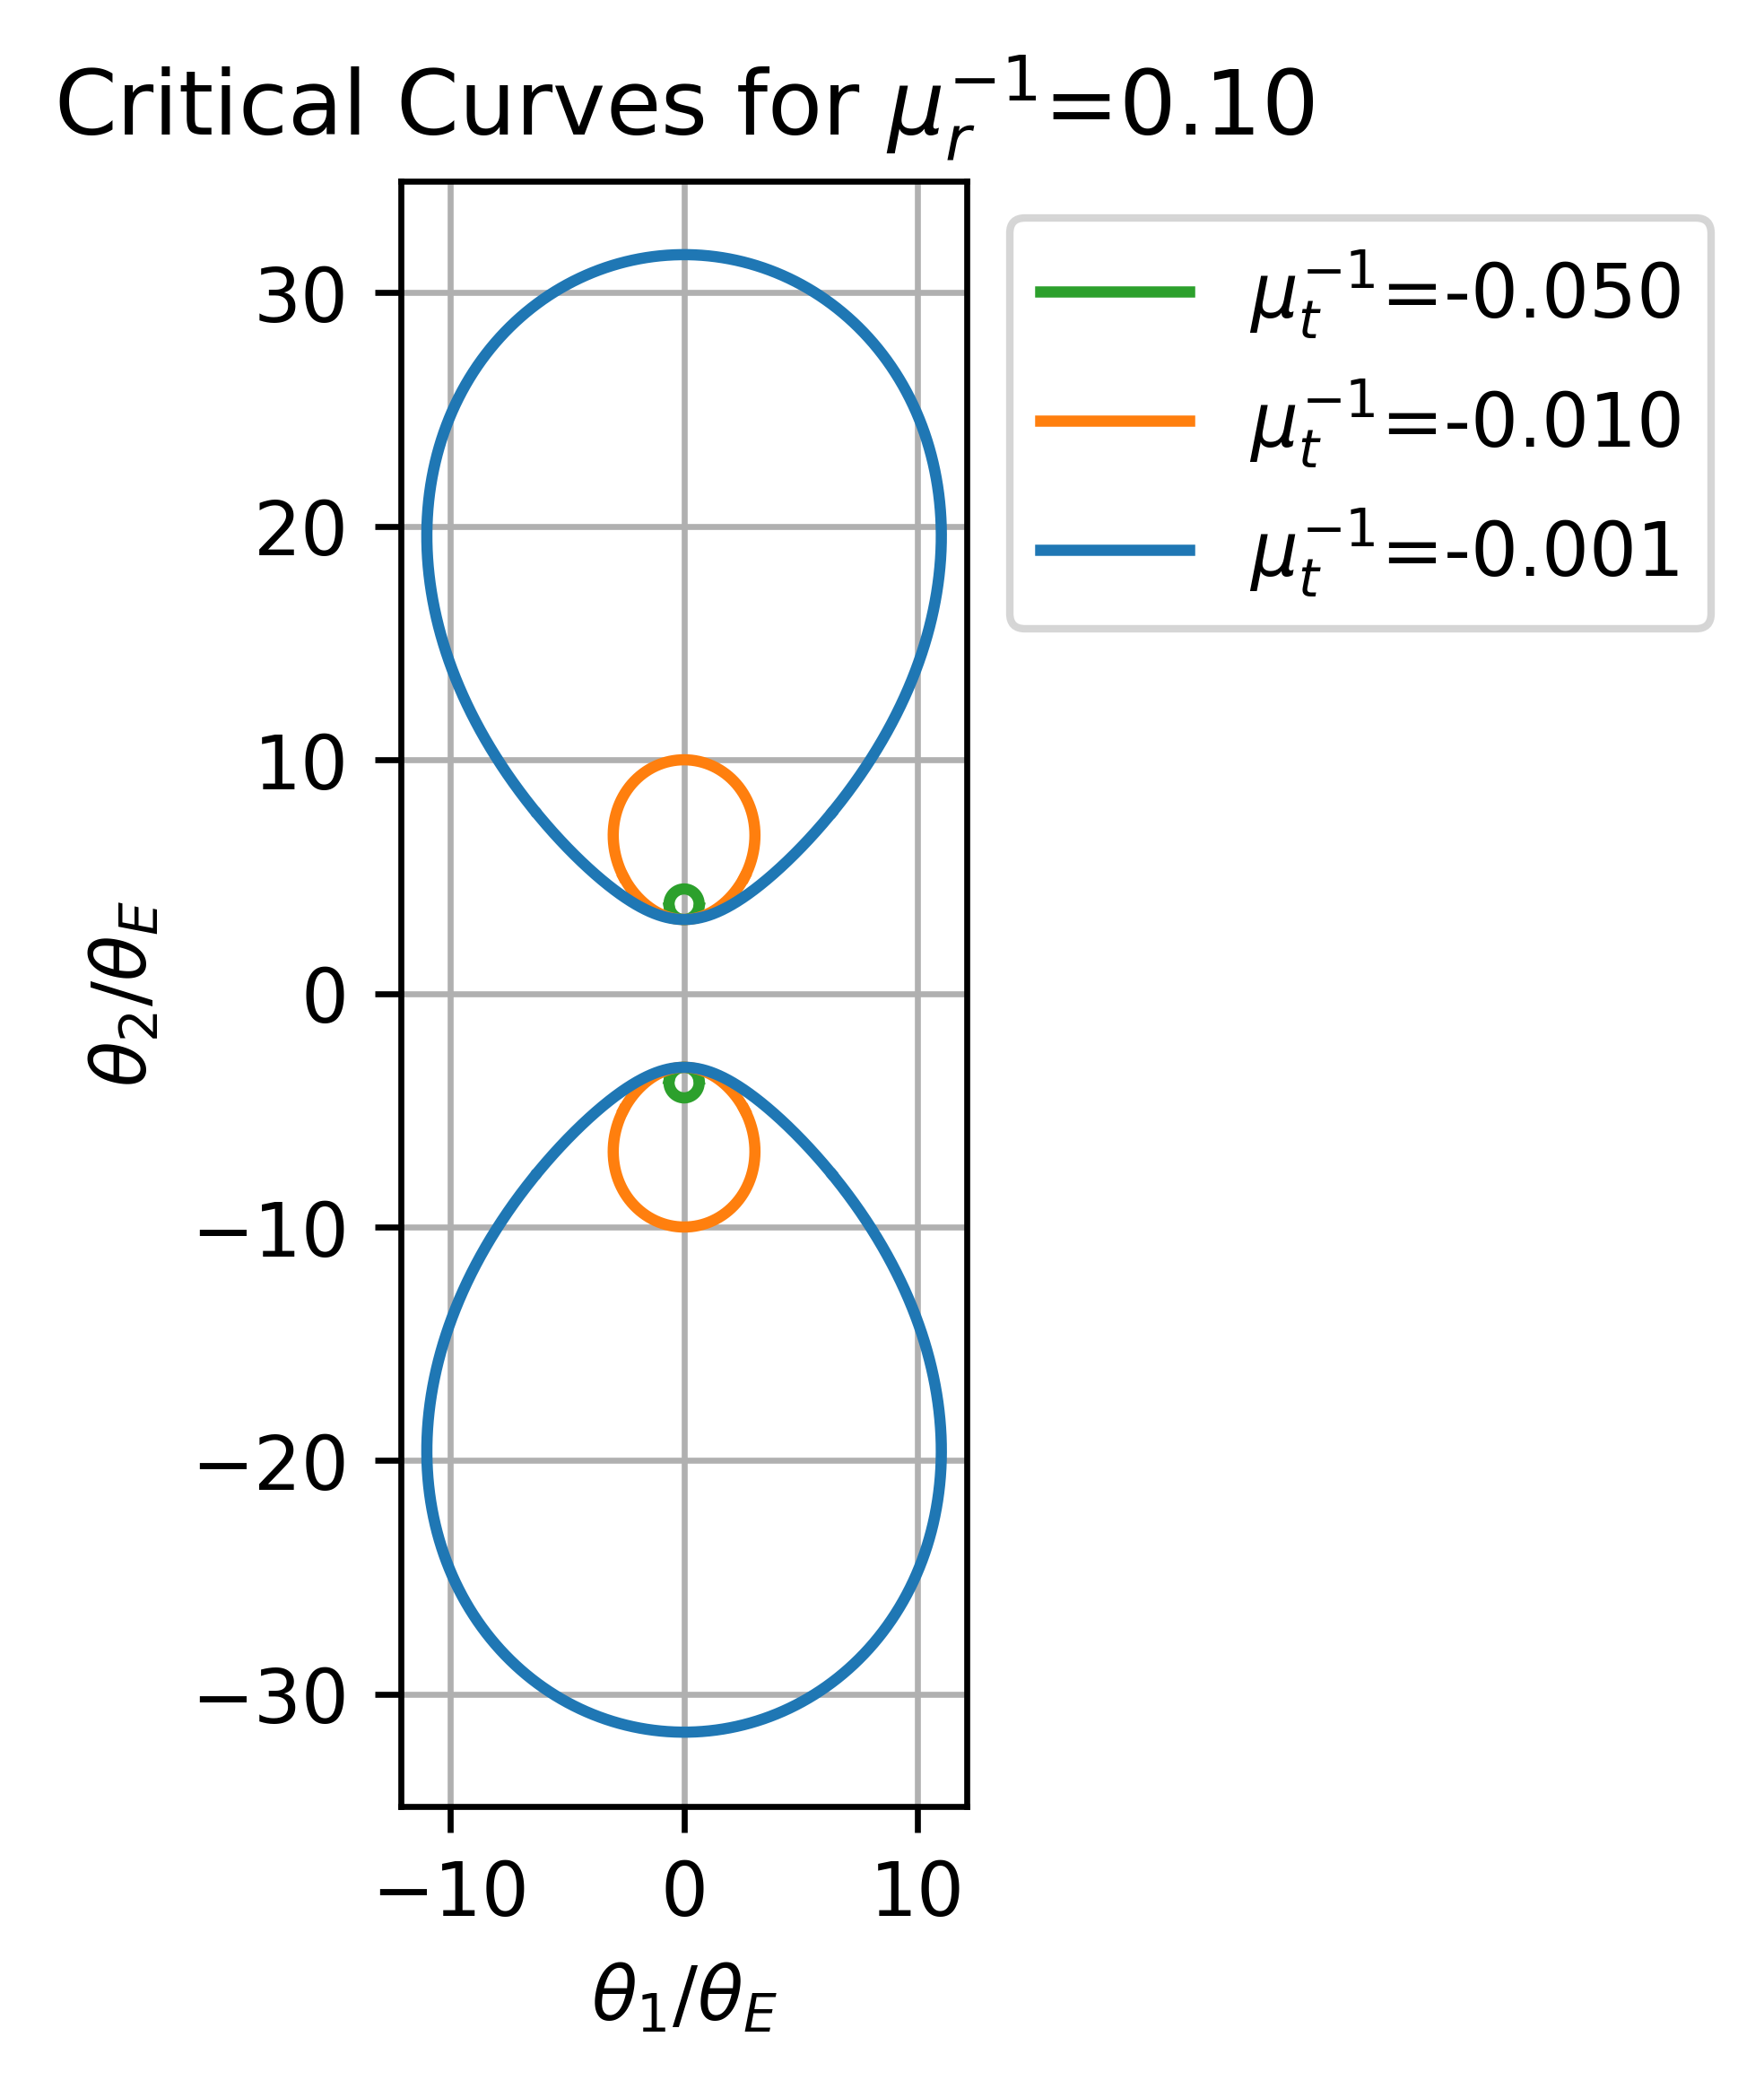

In [21]:
with PdfPages('./Images/critical_curves-mut-less-0-diff-mut.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_t,color in zip([-1/0.05,-1/0.01,-1/0.001],['tab:blue','tab:orange','tab:green'][::-1]):
        mu_r = 1/0.1
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        ax.plot(cc3*np.cos(phi),cc3*np.sin(phi),color=color,label='$\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
        ax.plot(cc1*np.cos(phi),cc1*np.sin(phi),color=color)
        # Remarks: These estimates are only accurate for |mu_t|>>|mu_r|>>1
        #ax.axvline(np.sqrt((abs(mu_t))/8),color='grey',ls='--') # Plotting the guiding lines for width of lobe
        #ax.axhline(np.sqrt(3*abs(mu_t)/8),color='grey',ls='--') # Plotting the guiding lines for width of lobe (y-pos)
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_r^{-1}$='+f'{mu_r**(-1):.2f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig( bbox_inches='tight')
    

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)
/tmp/ipykernel_516/2623666231.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)+np.sqrt(4*mu_t*mu_r+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


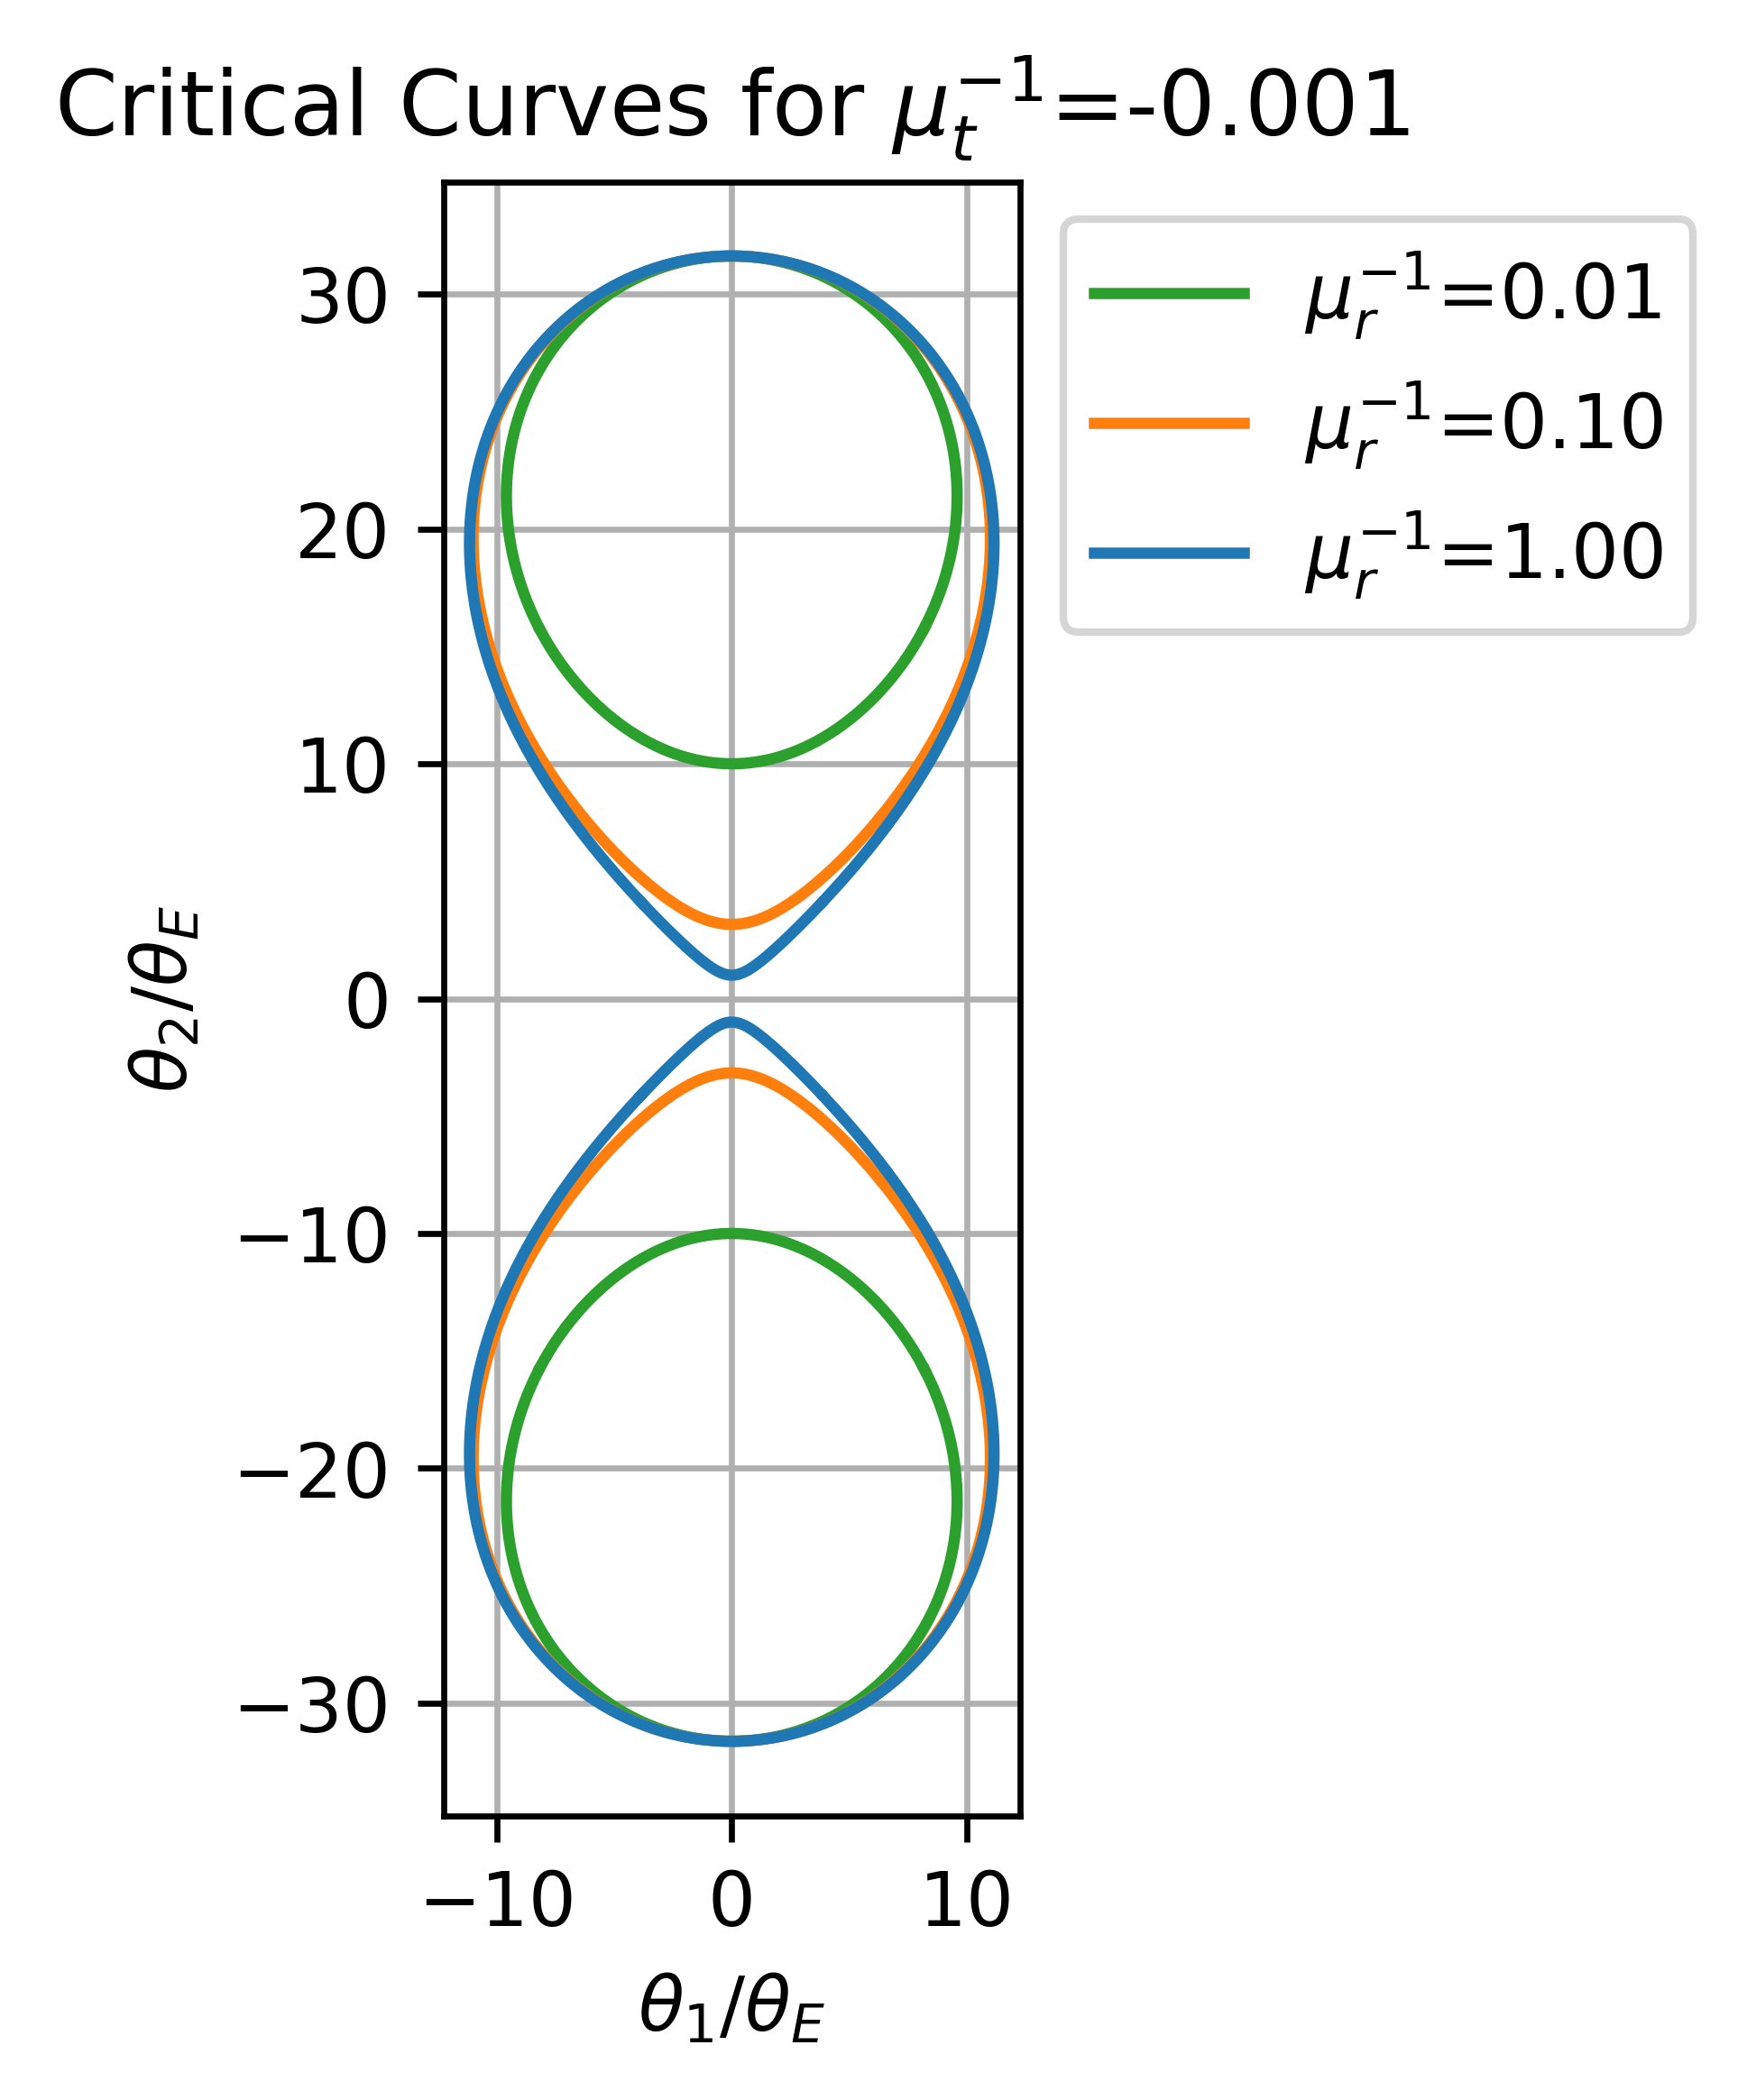

In [10]:
with PdfPages('./Images/critical_curves-mut-less-0-diff-mur.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_r,color in zip([1/0.01,1/0.1,1/1.0],['tab:blue','tab:orange','tab:green'][::-1]):
        mu_t = -1/0.001
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        ax.plot(cc3*np.cos(phi),cc3*np.sin(phi),color=color,label='$\mu_r^{-1}$='+f'{mu_r**(-1):.2f}')
        ax.plot(cc1*np.cos(phi),cc1*np.sin(phi),color=color)
        # Remarks: These estimates are only accurate for |mu_t|>>|mu_r|>>1
        # Remarks 2: Here the approximation basically breaks down because according to our approximation only depends on mu_t
        #ax.axvline(np.sqrt((abs(mu_t)-3*mu_r)/8),color='grey',ls='--') # Plotting the guiding lines for width of lobe
        #ax.axhline(np.sqrt(3*abs(mu_t)/8),color='grey',ls='--') # Plotting the guiding lines for width of lobe (y-pos)
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig( bbox_inches='tight')

# Caustic size estimation

The caustic corresponding to $\theta_1=0, \theta_2=\pm\sqrt{\mu_r}$ is $\beta_1=0$ and $\beta_2=\pm\left(\frac{\sqrt{\mu_r}}{\mu_t} - \frac{1}{\sqrt{\mu_r}}\right)$
Note that when $\mu_r=\mu_t$ the height of the caustic goes to zero

On the other hand, that along the $x_1$ axix, corresponding to $\theta_1=\sqrt{\mu_t}$ and $\theta_2=0$ is $\beta_1=\pm\left(\frac{\sqrt{\mu_t}}{\mu_r} -\frac{1}{\sqrt{\mu_t}}\right)$ and $\beta_2=0$

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


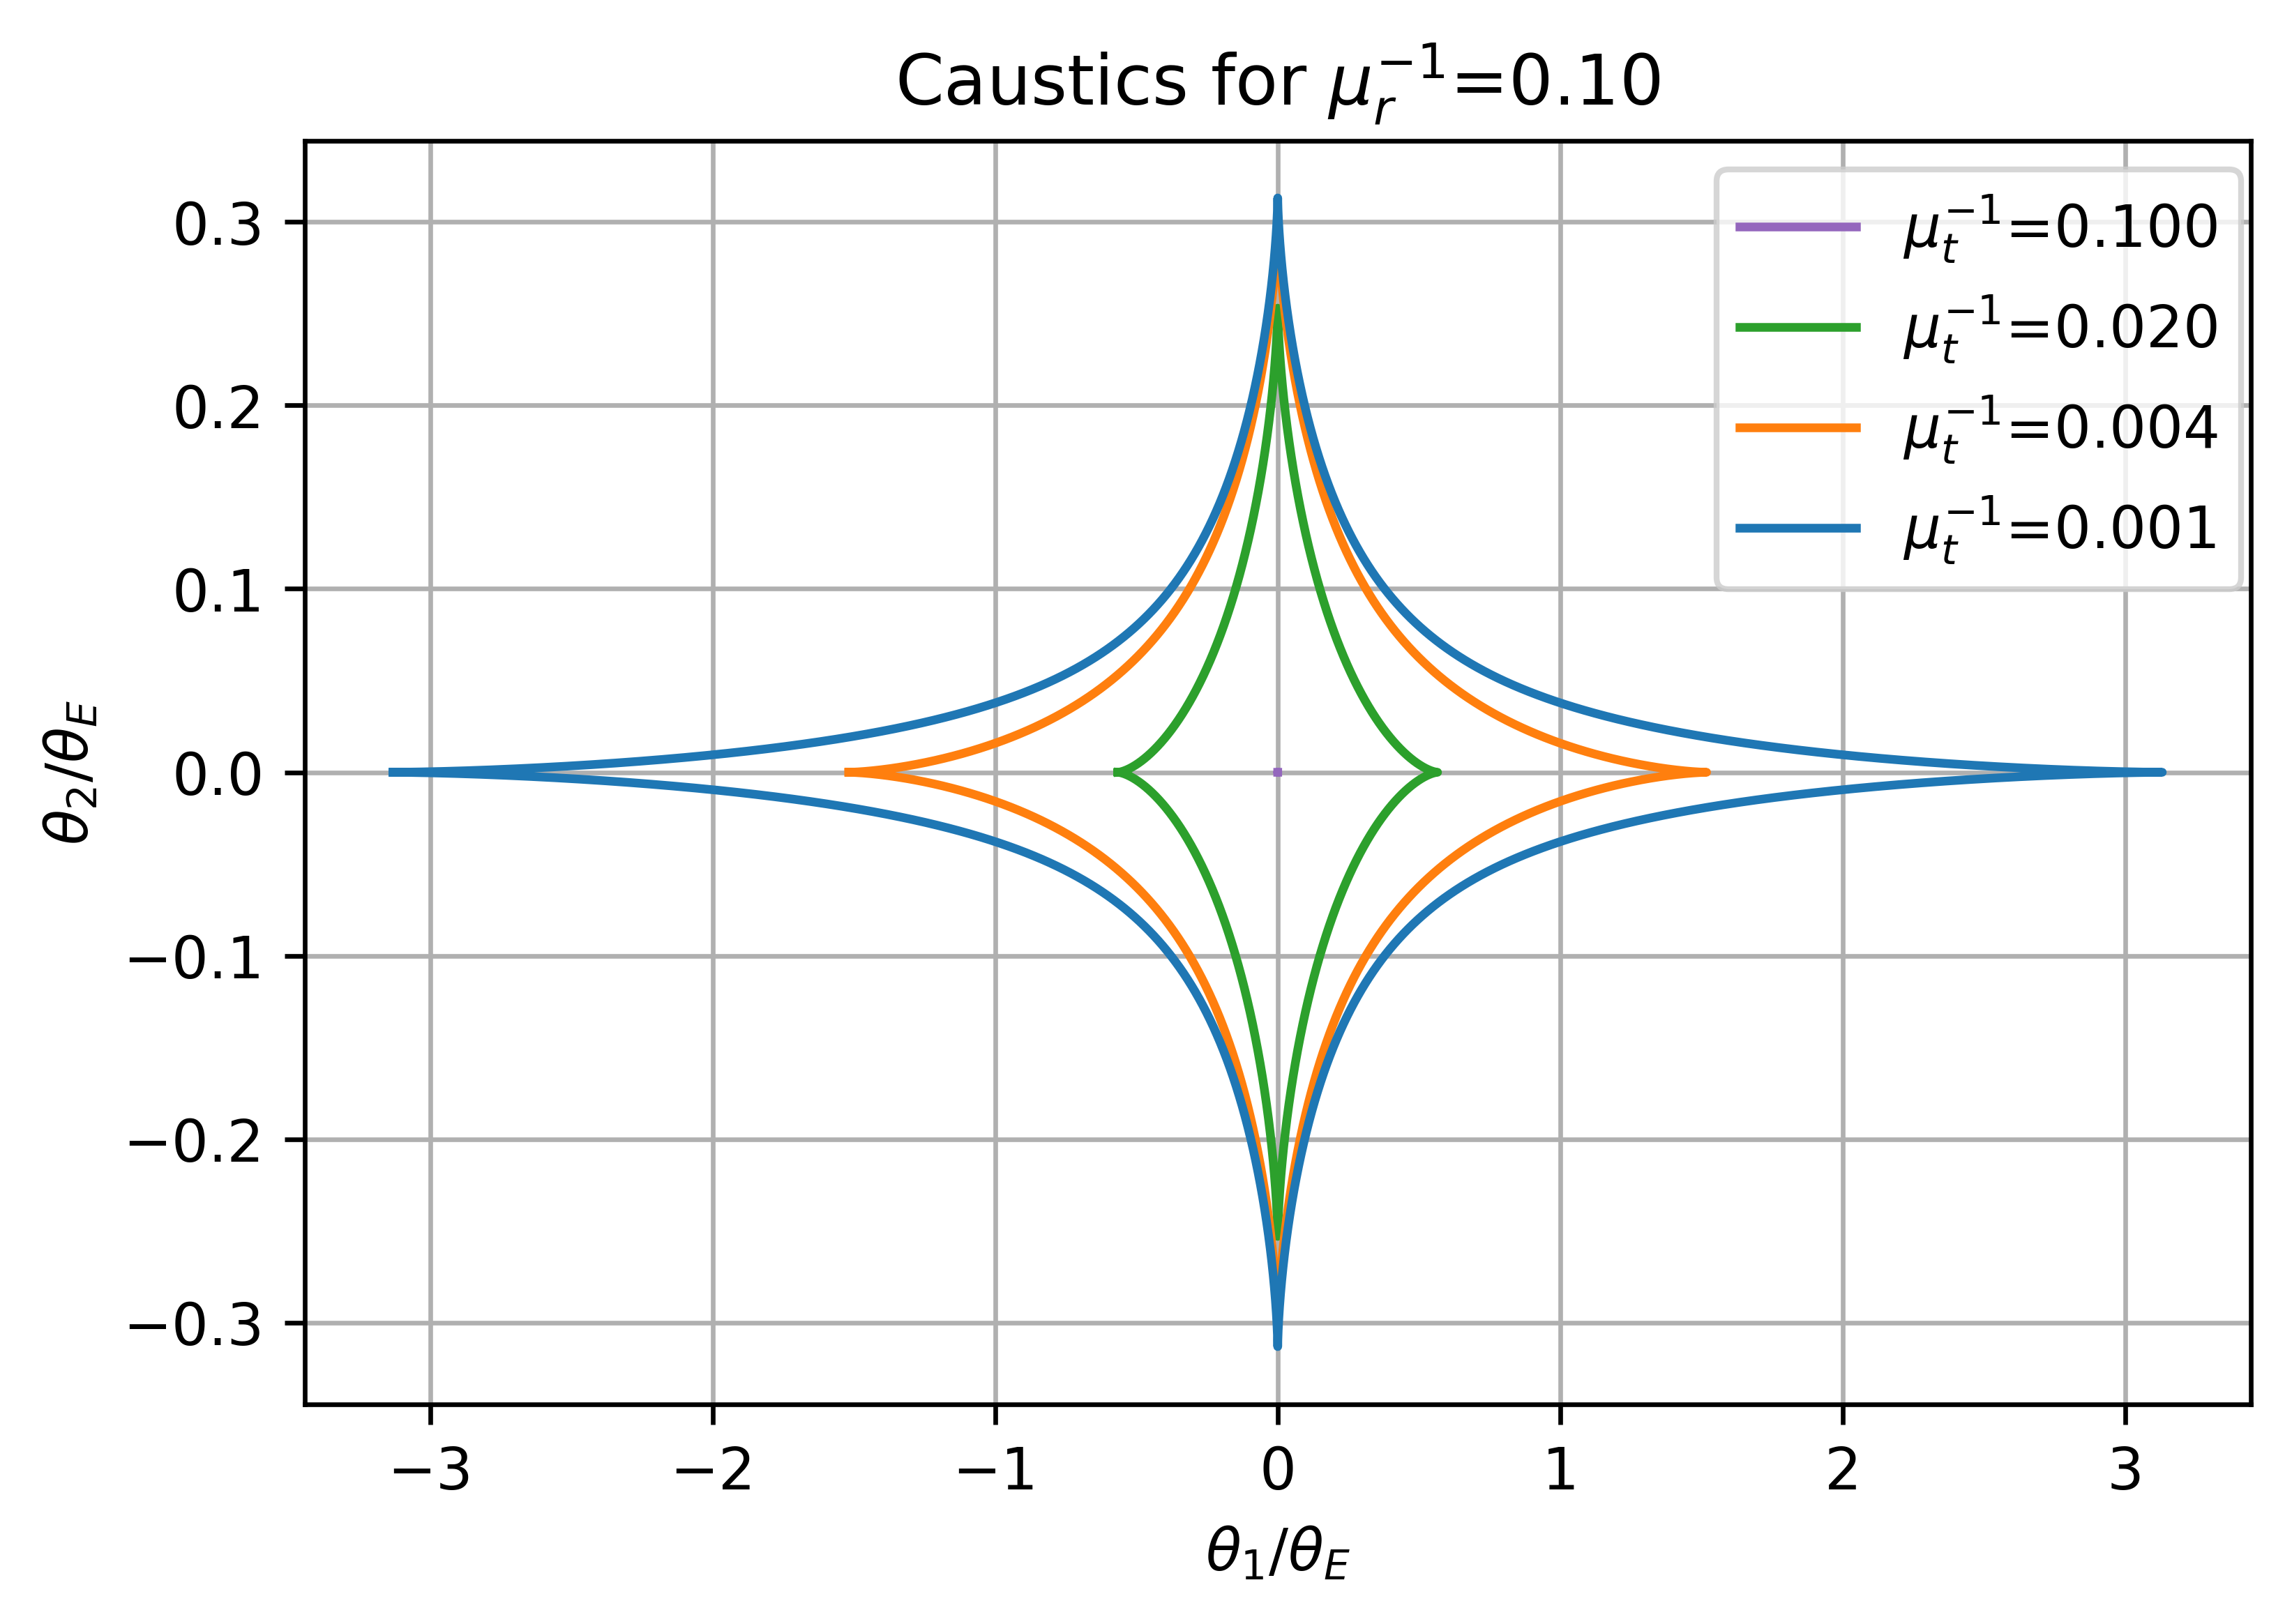

In [18]:
with PdfPages('./Images/caustics-mut-gtr-0-diff-mut.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_t,color in zip([1/0.1,1/0.02,1/0.004,1/0.001],['tab:blue','tab:orange','tab:green','tab:purple'][::-1]):
        mu_r = 1/0.1
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        beta1, beta2 = lens_mapping(cc3*np.cos(phi),cc3*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color,label='$\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
        beta1, beta2 = lens_mapping(cc1*np.cos(phi),cc1*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color)
        #ax.axvline(np.sqrt(abs(mu_t)/8)/mu_r,color='grey',ls='--')
        #ax.axhline(1/np.sqrt(mu_t),color='grey',ls='--')
    ax.grid()
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Caustics for $\mu_r^{-1}$='+f'{mu_r**(-1):.2f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig(bbox_inches='tight')

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


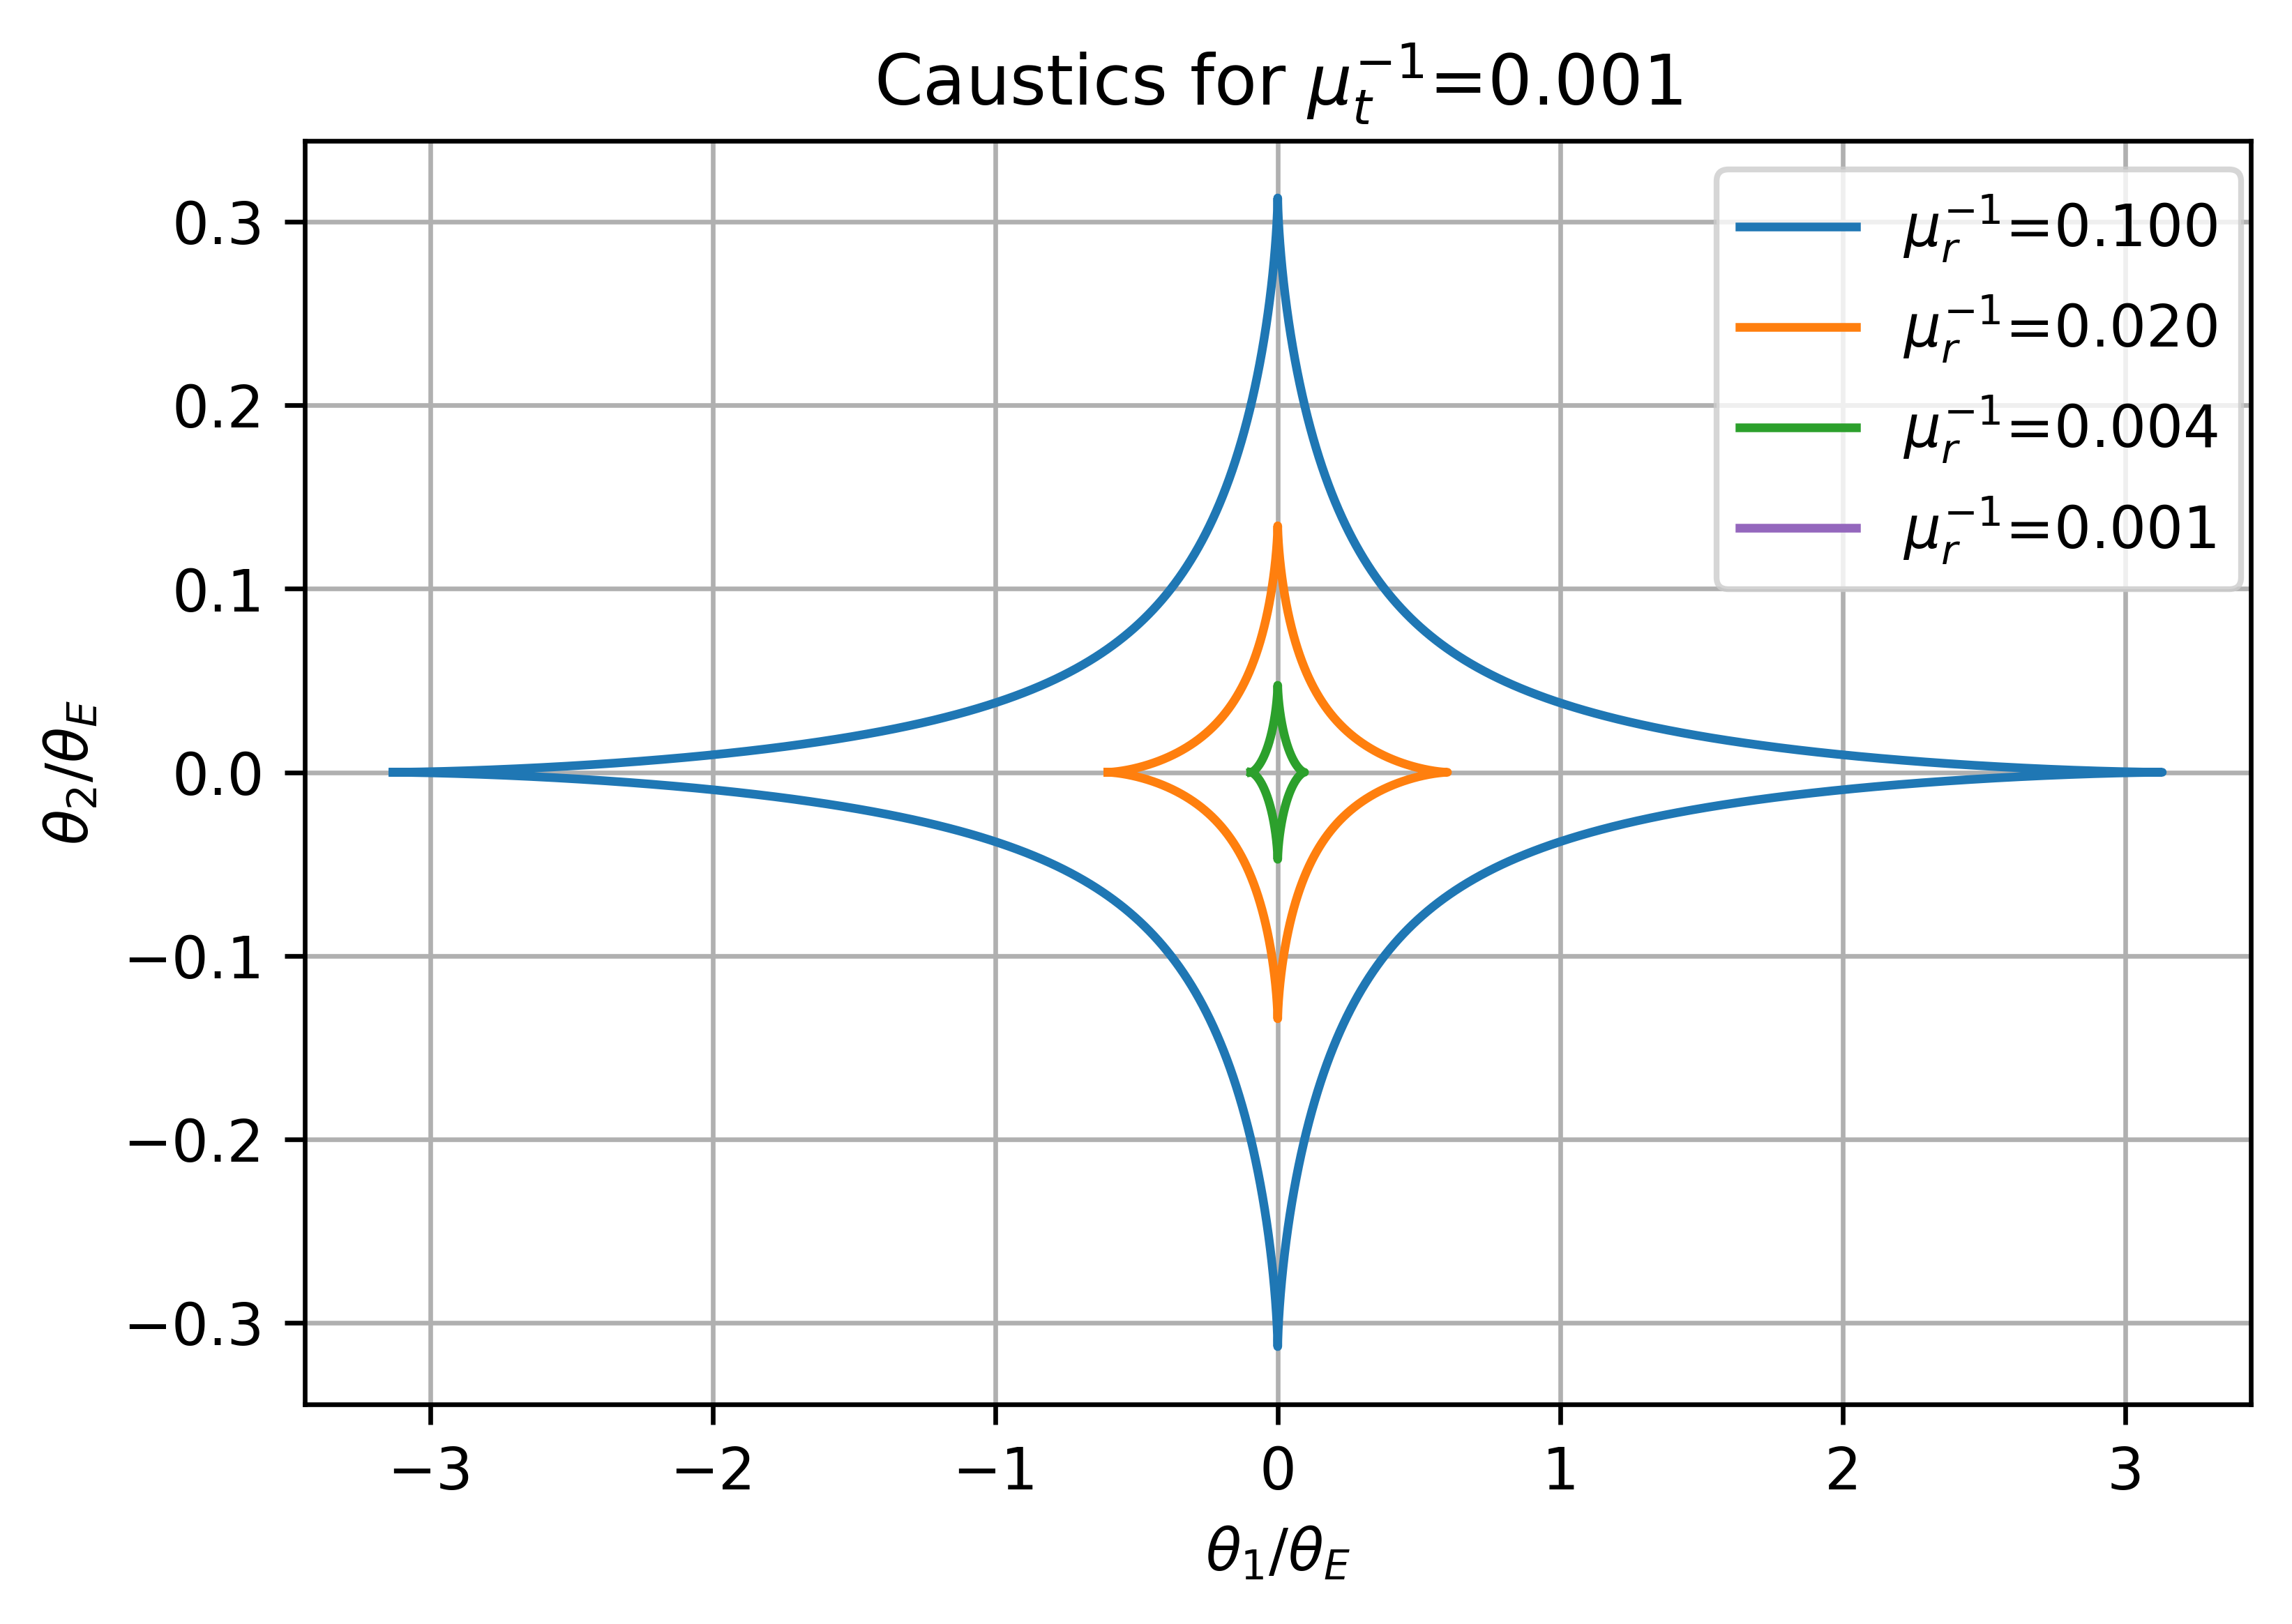

In [19]:
with PdfPages('./Images/caustics-mut-gtr-0-diff-mur.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,100000)
    for mu_r,color in zip([1/0.1,1/0.02,1/0.004,1/0.001],['tab:blue','tab:orange','tab:green','tab:purple']):
        mu_t = 1/0.001
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        beta1, beta2 = lens_mapping(cc3*np.cos(phi),cc3*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color,label='$\mu_r^{-1}$='+f'{mu_r**(-1):.3f}')
        beta1, beta2 = lens_mapping(cc1*np.cos(phi),cc1*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color)
        #ax.axvline(np.sqrt(abs(mu_t)/8)/mu_r,color='grey',ls='--')
    ax.grid()
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Caustics for $\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    pdf.savefig(bbox_inches='tight')

The case for $\mu_t<0$ is worked out too, basically the lower part of the caustics is $\pm\frac{2}{\sqrt{|\mu_t|}}$ and that of the upper part is $\frac{\sqrt{\mu_r}}{\mu_t}-\frac{1}{\sqrt{\mu_r}}$, the width is 

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)
/tmp/ipykernel_516/2623666231.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)+np.sqrt(4*mu_t*mu_r+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


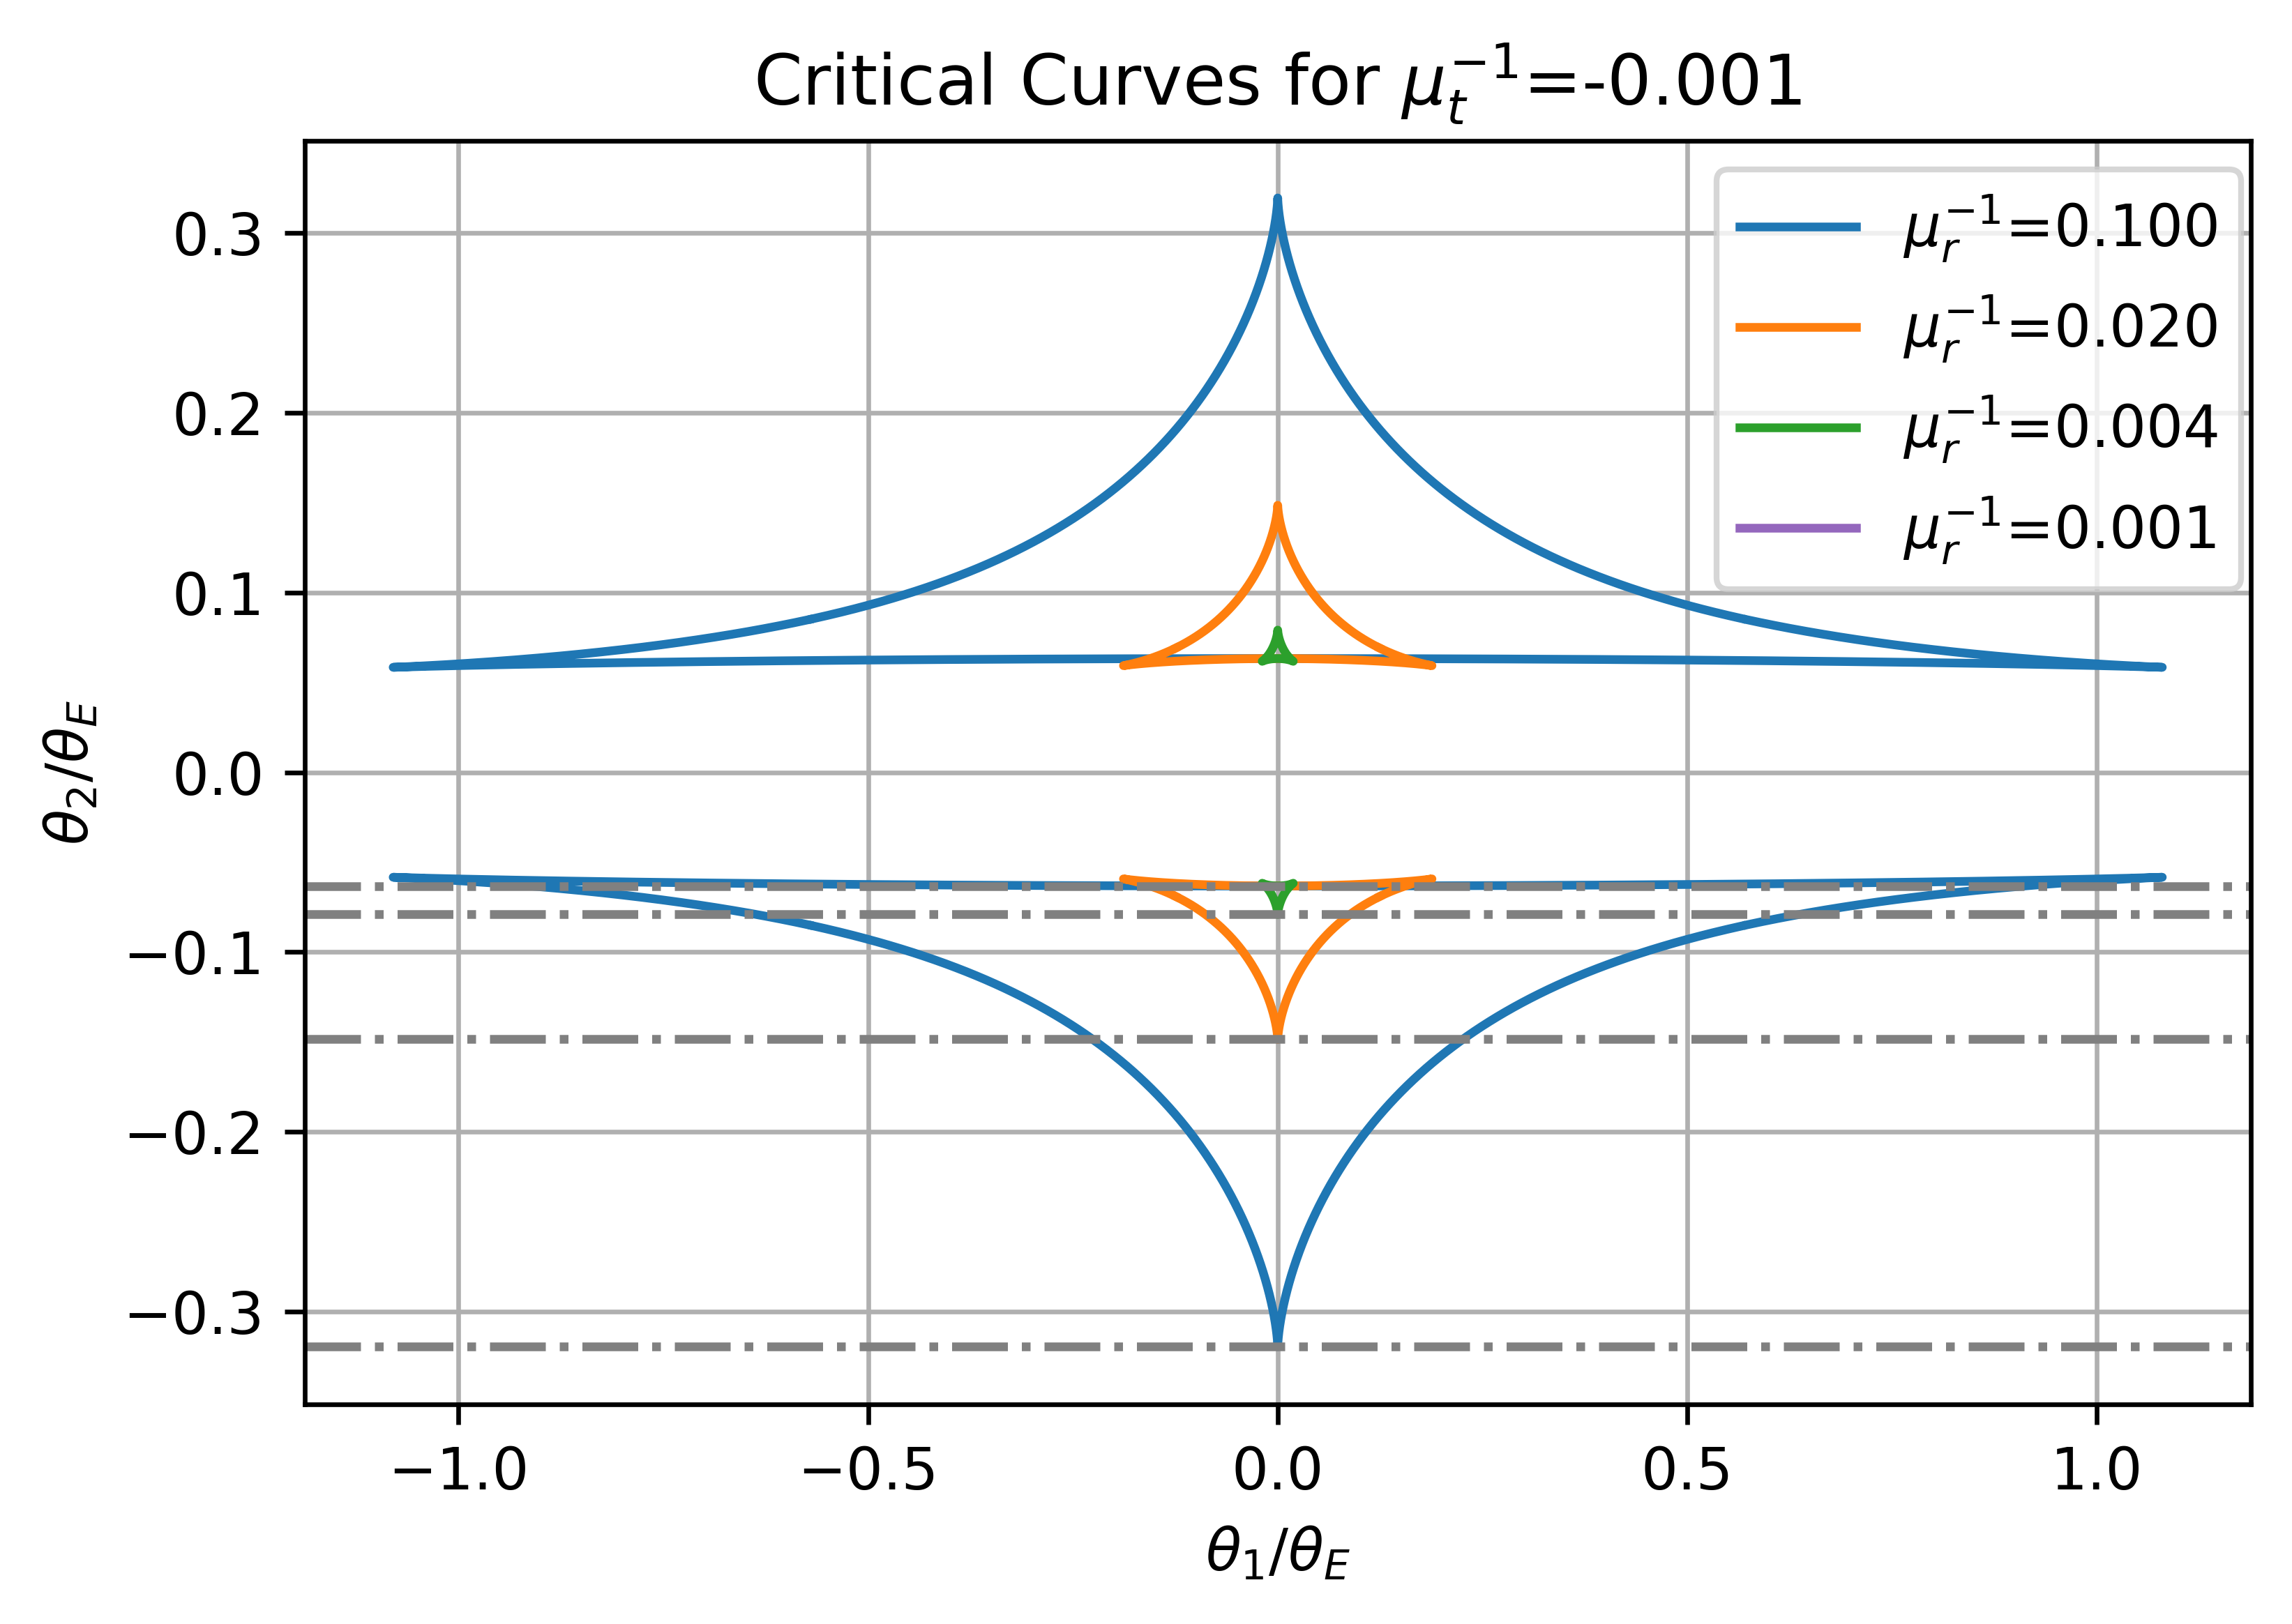

In [22]:
with PdfPages('./Images/caustics-mut-less-0-diff-mur.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,1000000)
    for mu_r,color in zip([1/0.1,1/0.02,1/0.004,1/0.001],['tab:blue','tab:orange','tab:green','tab:purple']):
        mu_t = -1/0.001
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        beta1, beta2 = lens_mapping(cc3*np.cos(phi),cc3*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color,label='$\mu_r^{-1}$='+f'{mu_r**(-1):.3f}')
        beta1, beta2 = lens_mapping(cc1*np.cos(phi),cc1*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color)
        #ax.axvline(np.sqrt(abs(mu_t)/8)/mu_r,color='grey',ls='--') # Width of caustic
        ax.axhline(np.sqrt(mu_r)/mu_t-1/np.sqrt(mu_r),color='grey',ls='-.') # Height of caustic 
    ax.grid()
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    #ax.axhline(2/np.sqrt(abs(mu_t)),color='grey',ls='--')
    pdf.savefig(bbox_inches='tight')

/tmp/ipykernel_516/2511433403.py:4: RuntimeWarning: invalid value encountered in sqrt
  cc1 = -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)-np.sqrt(4*mu_r*mu_t+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)
/tmp/ipykernel_516/2623666231.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(-mu_r*np.cos(2*phi)+mu_t*np.cos(2*phi)+np.sqrt(4*mu_t*mu_r+(mu_r*np.cos(2*phi)-mu_t*np.cos(2*phi))**2))/np.sqrt(2)


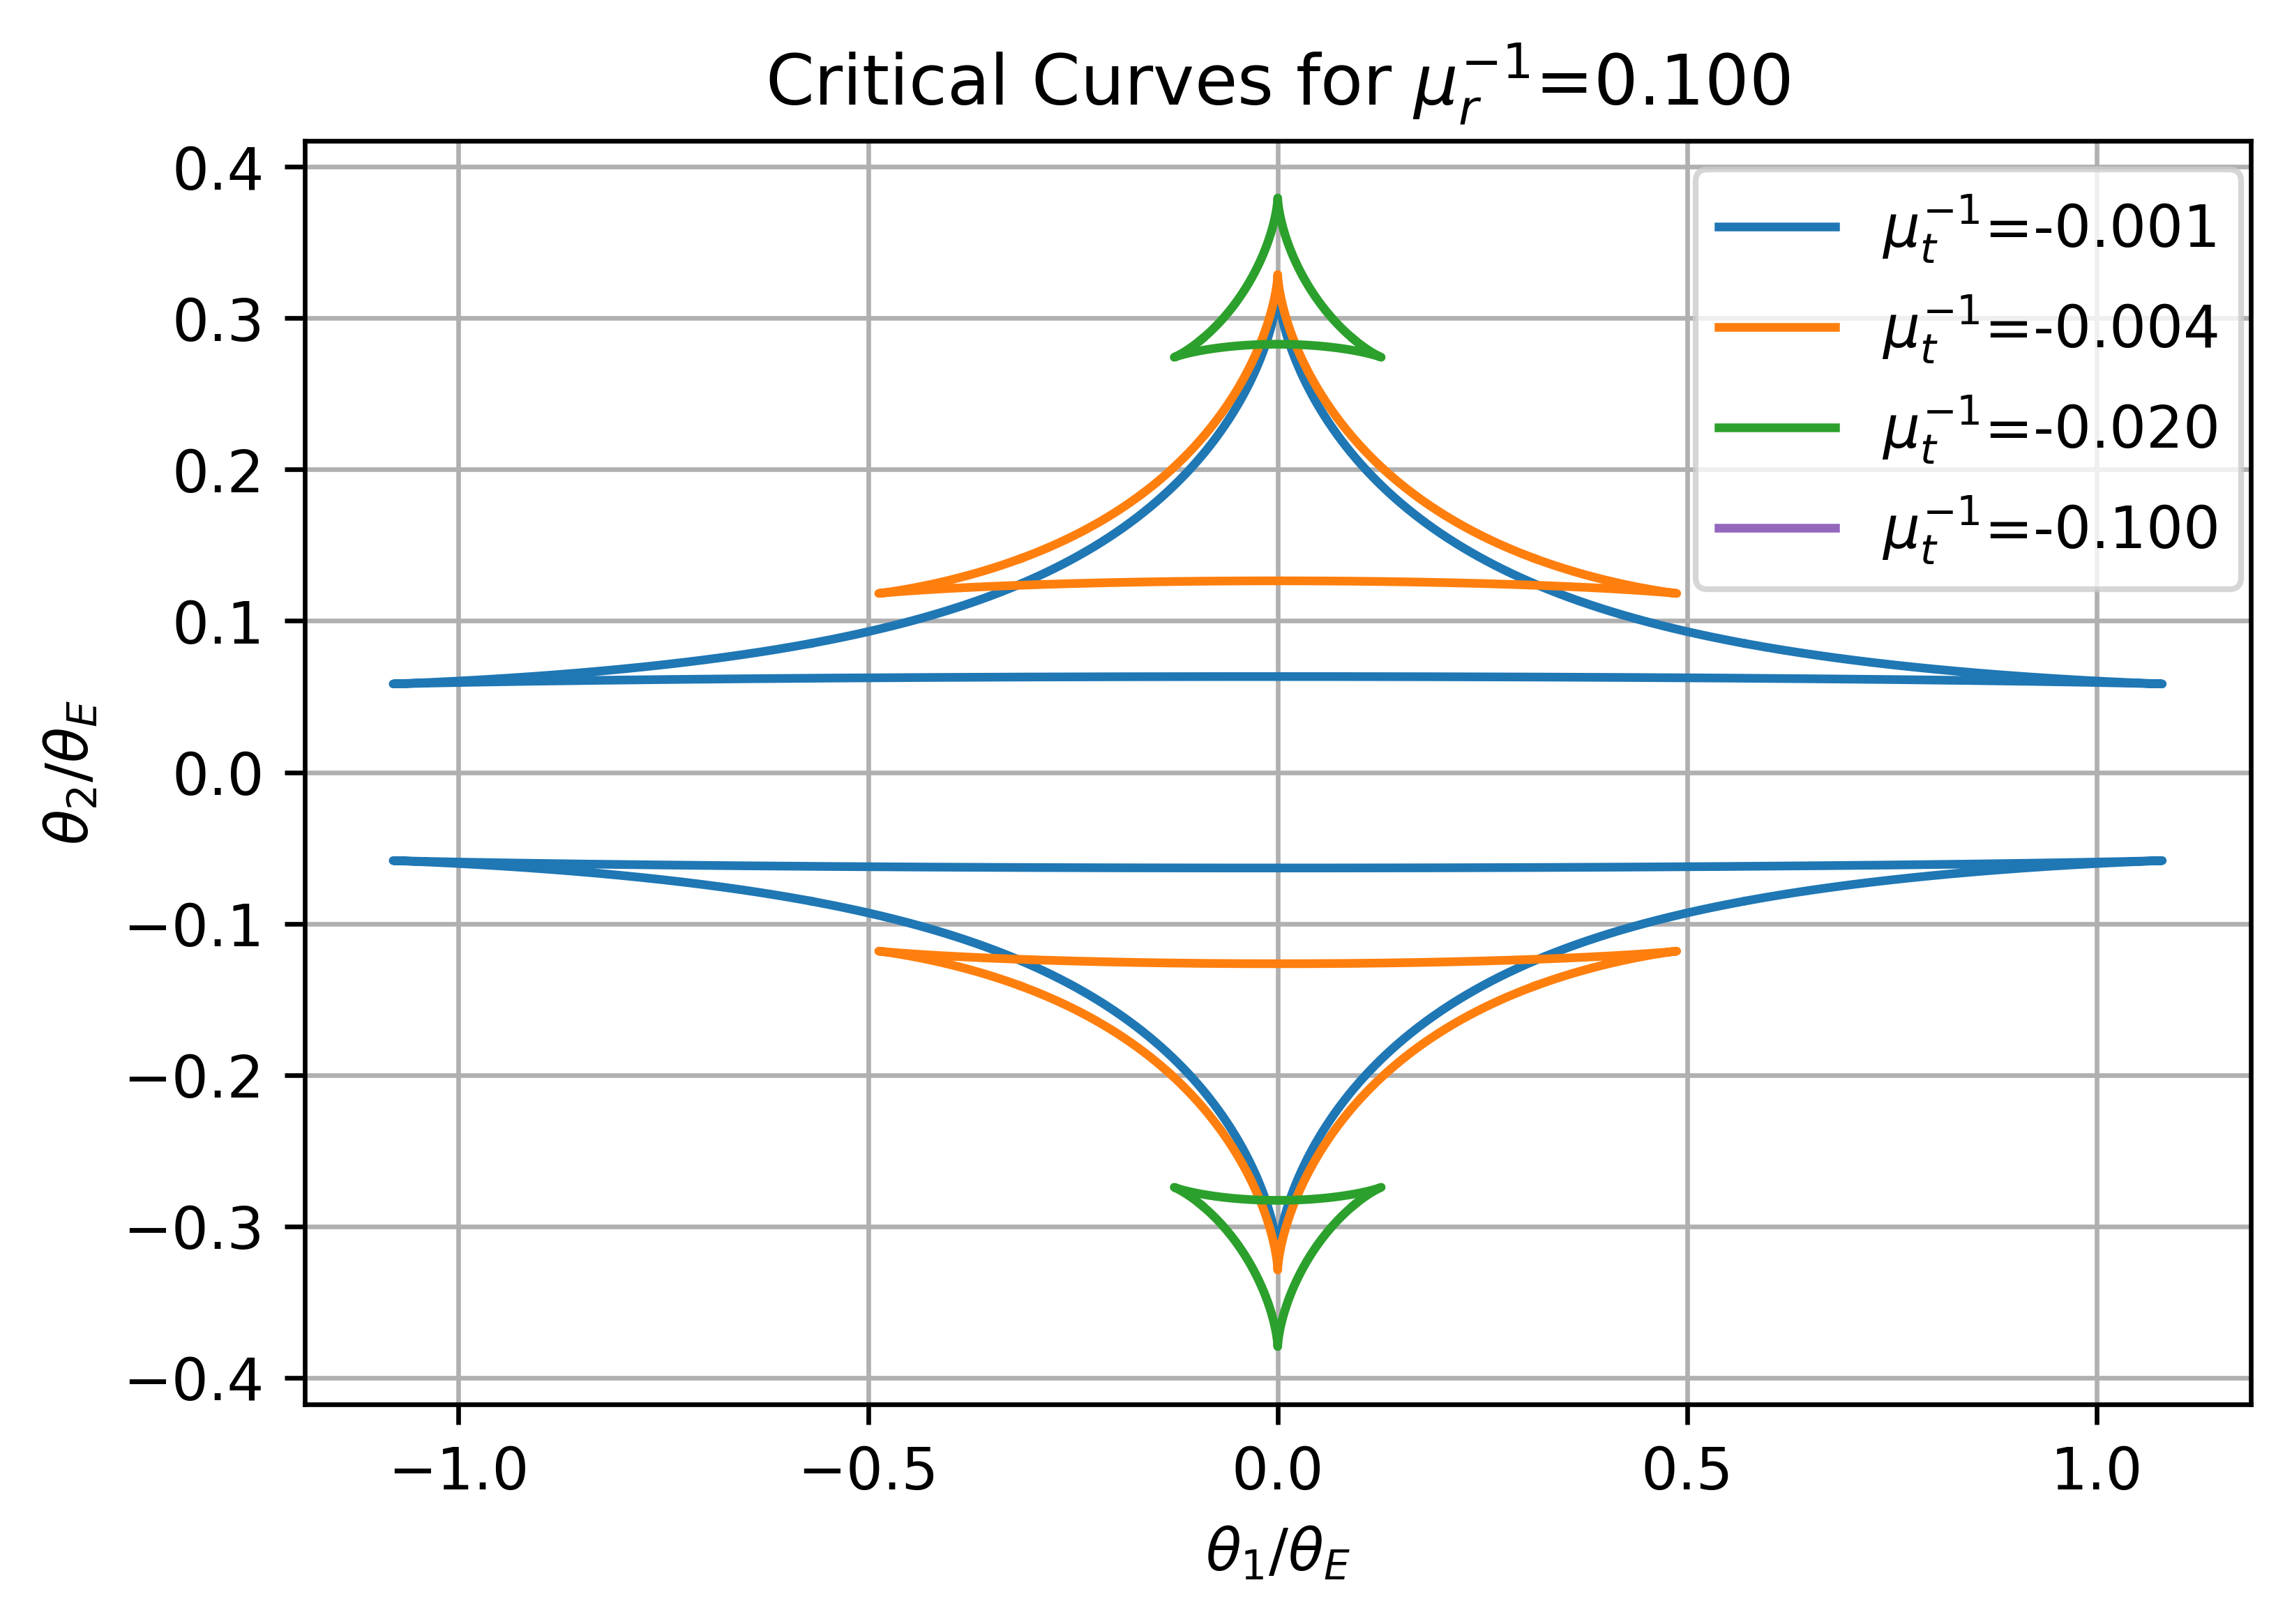

In [17]:
with PdfPages('./Images/caustics-mut-less-0-diff-mut.pdf') as pdf:
    fig = plt.figure(dpi=600)
    ax = fig.add_subplot()
    phi = np.linspace(0,2*np.pi,1000000)
    for mu_t,color in zip([-1/0.1,-1/0.02,-1/0.004,-1/0.001][::-1],['tab:blue','tab:orange','tab:green','tab:purple'][::]):
        mu_r = 1/0.1
        cc1 = critical_curve_1(phi,mu_r,mu_t)
        cc3 = critical_curve_3(phi,mu_r,mu_t)
        beta1, beta2 = lens_mapping(cc3*np.cos(phi),cc3*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color,label='$\mu_t^{-1}$='+f'{mu_t**(-1):.3f}')
        beta1, beta2 = lens_mapping(cc1*np.cos(phi),cc1*np.sin(phi),mu_r,mu_t)
        ax.plot(beta1,beta2,color=color)
        #ax.axvline(np.sqrt(abs(mu_t)/8)/mu_r,color='grey',ls='--') # Width of caustic
        #ax.axhline(np.sqrt(mu_r)/mu_t-1/np.sqrt(mu_r),color='grey',ls='-.') # Height of caustic 
    ax.grid()
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_1/\theta_E$')
    ax.set_ylabel(r'$\theta_2/\theta_E$')
    ax.set_title('Critical Curves for $\mu_r^{-1}$='+f'{mu_r**(-1):.3f}')
    ax.legend(bbox_to_anchor=(1.01, 1))
    #ax.axhline(2/np.sqrt(abs(mu_t)),color='grey',ls='--')
    pdf.savefig(bbox_inches='tight')